/tmp/ipykernel_6539/762874879.py:122: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


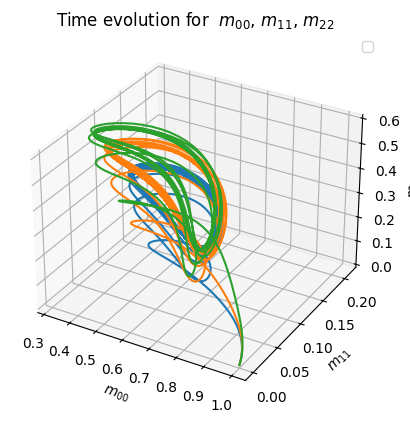

In [22]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Systemparameter
kappa = 1
gamma = 1
Gamma = 2
delta_1 = 1
delta_2=2
Omega = 4
V = -4
eta = 1
g_0 = 1

# Anfangswerte basierend auf den gegebenen Bedingungen
a0 = 0
a_dagger_0 = 0

psi00 = 1
psi22 = 0
psi02 = 0
psi20 = 0
psi11 = 0 + 0j
psi10 = 0.0 + 0j
psi01 = 0.0 + 0j
psi21 = 0.0 + 0j
psi12 = 0.0 + 0j
# ###############################################
# psi00 = 0.22126401471204346+0.00000000000000000j
# psi01 = -0.08848295633418553+0.01053474291022076j
# psi02 = 0.14708679268214447+0.08824619749394745j
# psi10 = -0.08848295633418551-0.01053474291022076j
# psi11 = 0.40964736774926508+0.00000000000000000j
# psi12 = 0.04803199437240167+0.04791001321433958j
# psi20 = 0.14708679268214447-0.08824619749394745j
# psi21 = 0.04803199437240166-0.04791001321433959j
# psi22 = 0.36908861753869154+0.00000000000000000j
# ###########################################################
# psi00 = 0.42743978389599452-0.00000000000000000j
# psi01 = -0.00242717946708269+0.00245732003154052j
# psi02 = -0.08020124195468742+0.01893082870305987j
# psi10 = -0.00242717946708264-0.00245732003154052j
# psi11 = 0.38133759336533030-0.00000000000000000j
# psi12 = -0.16361655498304439+0.03555700302893297j
# psi20 = -0.08020124195468743-0.01893082870305987j
# psi21 = -0.16361655498304439-0.03555700302893297j
# psi22 = 0.19122262273867507+0.00000000000000001j
# #######################################################
# psi00 = 0.39891701636205945-0.00000000000000000j
# psi01 = -0.02537244024450262+0.01050376445543362j
# psi02 = 0.01299913807966735-0.00421390775396491j
# psi10 = -0.02537244024450263-0.01050376445543362j
# psi11 = 0.17518374552469493+0.00000000000000000j
# psi12 = 0.03532664123608436-0.02849089412586864j
# psi20 = 0.01299913807966737+0.00421390775396491j
# psi21 = 0.03532664123608433+0.02849089412586863j
# psi22 = 0.42589923811324565-0.00000000000000000j
# #######################################################
# psi00 = 0.26485616970118581+0.00000000000000000j
# psi01 = -0.00301234032592795+0.03248387349302927j
# psi02 = -0.03546927488252690+0.03558816361969287j
# psi10 = -0.00301234032592795-0.03248387349302927j
# psi11 = 0.33806283223784794+0.00000000000000000j
# psi12 = 0.11841855442495972+0.08048676359484966j
# psi20 = -0.03546927488252691-0.03558816361969287j
# psi21 = 0.11841855442495972-0.08048676359484966j
# psi22 = 0.39708099806096636+0.00000000000000000j
# #######################################################

startcond = [a0, a_dagger_0, psi00, psi01, psi10, psi11, psi22, psi21, psi12, psi20, psi02]

# Differentialgleichungssystem
def dydt(t, y):
    a, a_dagger, ket00, ket01, ket10, ket11, ket22, ket21, ket12, ket20, ket02 = y
    
    da_dt = -kappa/2 * a - 1j * (gamma * ket01) + eta
    da_dagger_dt = np.conj(da_dt)
    dket00_dt = +Gamma * ket11 + 1j * gamma * (ket10 * a - ket01 * a_dagger)
    dket01_dt = -Gamma/2 * ket01 + 1j * (-delta_1 * ket01 + gamma * (ket11 * a - ket00 * a) - Omega/2 * ket02)
    dket10_dt = np.conj(dket01_dt)
    dket11_dt = -Gamma * ket11 + 1j * gamma * (ket01 * a_dagger - ket10 * a) + 1j * Omega/2 * (ket21 - ket12)
    dket22_dt = 1j * Omega / 2 * (ket12 - ket21)
    dket21_dt = -Gamma/2 * ket21 + 1j * (delta_2 * ket21 - delta_1 * ket21 - gamma * ket20 * a + Omega/2 * (ket11 - ket22) + 2 * V * ket21 * ket22)
    dket12_dt = np.conj(dket21_dt)
    dket02_dt = 1j * (-delta_2 * ket02 - Omega/2 * ket01 - 2 * V * ket02 * ket22 + gamma * ket12 * a)
    dket20_dt = np.conj(dket02_dt)
    
    return [da_dt, da_dagger_dt, dket00_dt, dket01_dt, dket10_dt, dket11_dt, dket22_dt, dket21_dt, dket12_dt, dket20_dt, dket02_dt]

# Parameterbereich für delta_2
delta_vals = np.arange(1.2, 3, 0.6)

# Erstellen des 3D-Plots
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Schleife über verschiedene delta_2 Werte und Simulationen durchführen
for delta_2 in delta_vals:
    # Numerische Integration mit DOP853
    t_span = (0, 2000)  # Längere Simulationszeit
    t_eval = np.linspace(0, 2000, 60000)  # Höhere Auflösung
    sol = solve_ivp(dydt, t_span, startcond, method='DOP853', t_eval=t_eval, dense_output=True, atol=1e-12, rtol=1e-12)
    
    # Definition von t und y
    t = sol.t
    y = sol.y

    # Extrahieren der relevanten Komponenten
    m_00 = np.real(y[2])
    m_11 = np.real(y[5])
    m_22 = np.real(y[6])
    
    # 3D-Plot der zeitlichen Entwicklung
    ax.plot(m_00, m_11, m_22)#, label=f'$\delta_2 = {delta_2}$')

# Achsenbeschriftungen und Titel
ax.set_xlabel('$m_{00}$')
ax.set_ylabel('$m_{11}$')
ax.set_zlabel('$m_{22}$')
ax.set_title('Time evolution for  $m_{00}$, $m_{11}$, $m_{22}$')
ax.legend()

# Plot anzeigen
plt.show()



Gif creation

In [ ]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import os
import imageio

# Systemparameter
kappa = 1
gamma = 1
Gamma = 2
delta_1 = 1
Omega = 4
V = -4
eta = 1
g_0 = 1

# Anfangswerte basierend auf den gegebenen Bedingungen
a0 = 0
a_dagger_0 = 0
psi00 = 1
psi22 = 0

psi02 = 0
psi20 = 0

psi11 = 0 + 0j
psi10 = 0.0 + 0j
psi01 = 0.0 + 0j
psi21 = 0.0 + 0j
psi12 = 0.0 + 0j

startcond = [a0, a_dagger_0, psi00, psi01, psi10, psi11, psi22, psi21, psi12, psi20, psi02]

# Erstellen eines Verzeichnisses zum Speichern der Plots
output_dir = r"/home/paul/Documents/atm/Bachelor-Arbeit-master/plotting/gifs_limit_cycle"
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Numerische Berechnung der Jacobi-Matrix mit finite Differenzen
def numerical_jacobian(y, dydt, epsilon=1e-8):
    n = len(y)
    J_num = np.zeros((n, n), dtype=complex)
    
    # Zentrale Differenzenmethode
    for i in range(n):
        y_eps_plus = np.copy(y)
        y_eps_minus = np.copy(y)
        y_eps_plus[i] += epsilon
        y_eps_minus[i] -= epsilon
        
        f_eps_plus = np.array(dydt(0, y_eps_plus))
        f_eps_minus = np.array(dydt(0, y_eps_minus))
        
        J_num[:, i] = (f_eps_plus - f_eps_minus) / (2 * epsilon)
    
    return J_num

delta_vals = np.arange(-4, 6, 0.1)
for i, delta_2 in enumerate(delta_vals):

    # Differentialgleichungssystem
    def dydt(t, y):
        a, a_dagger, ket00, ket01, ket10, ket11, ket22, ket21, ket12, ket20, ket02 = y
        
        da_dt = -kappa/2 * a - 1j * (gamma * ket01) + eta
        da_dagger_dt = np.conj(da_dt)
        dket00_dt = +Gamma * ket11 + 1j * gamma * (ket10 * a - ket01 * a_dagger)
        dket01_dt = -Gamma/2 * ket01 + 1j * (-delta_1 * ket01 + gamma * (ket11 * a - ket00 * a) - Omega/2 * ket02)
        dket10_dt = np.conj(dket01_dt)
        dket11_dt = -Gamma * ket11 + 1j * gamma * (ket01 * a_dagger - ket10 * a) + 1j * Omega/2 * (ket21 - ket12)
        dket22_dt = 1j * Omega / 2 * (ket12 - ket21)
        dket21_dt = -Gamma/2 * ket21 + 1j * (delta_2 * ket21 - delta_1 * ket21 - gamma * ket20 * a + Omega/2 * (ket11 - ket22) + 2 * V * ket21 * ket22)
        dket12_dt = np.conj(dket21_dt)
        dket02_dt = 1j * (-delta_2 * ket02 - Omega/2 * ket01 - 2 * V * ket02 * ket22 + gamma * ket12 * a)
        dket20_dt = np.conj(dket02_dt)
        
        return [da_dt, da_dagger_dt, dket00_dt, dket01_dt, dket10_dt, dket11_dt, dket22_dt, dket21_dt, dket12_dt, dket20_dt, dket02_dt]

    # Numerische Integration mit DOP853
    t_span = (0, 2000)  # Längere Simulationszeit
    t_eval = np.linspace(0, 2000, 100000)  # Höhere Auflösung
    sol = solve_ivp(dydt, t_span, startcond, method='DOP853', t_eval=t_eval, dense_output=True, atol=1e-12, rtol=1e-12)

    # Definition von t und y
    t = sol.t
    y = sol.y

    # Extrahieren der relevanten Komponenten
    m_00 = np.real(y[2])
    m_11 = np.real(y[5])
    m_22 = np.real(y[6])

    # 3D-Plot der zeitlichen Entwicklung
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.plot(m_00, m_11, m_22, label='Zeitliche Entwicklung')
    ax.set_xlabel('$m_{00}$')
    ax.set_ylabel('$m_{11}$')
    ax.set_zlabel('$m_{22}$')
    ax.set_title(f'Zeitliche Entwicklung im Raum $m_{00}$, $m_{11}$, $m_{22}$ für $\\delta_2 = {delta_2}$')
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    ax.set_zlim(0, 1)
    plt.legend()
    
    # Speichern des Plots
    plt.savefig(os.path.join(output_dir, f'plot_{i:03d}.png'))
    plt.close(fig)

# Erstellen eines GIFs aus den gespeicherten Plots
images = []
for filename in sorted(os.listdir(output_dir)):
    if filename.endswith(".png"):
        filepath = os.path.join(output_dir, filename)
        images.append(imageio.imread(filepath))

imageio.mimsave('zeitliche_entwicklung_static.gif', images, duration=0.1)

Adiabatic sweeps